# Foundations of Machine Learning Models

## Assignment: Polynomial Regression I

#### Name: Richard Lee

### Details
The purpose of this assignment is expose you to a polynomial regression problem. Your goal is to:

1. Create the following figure using matplotlib, which plots the data from the file called `PolynomialRegressionData_I.csv`.  
2. Perform a PolynomialFeatures transformation, then perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="PolynomialDataPlot_I.png" width ="800" />

Below is the second figure you must emulate:

<img src="PolynomialDataPlot_II.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `PolynomialRegressionData_I.csv`.

In [2]:
import pandas as pd

fileName = "PolynomialRegressionData_I.csv"
df = pd.read_csv(fileName)
df

,x,y,z
0,-3.319120,-2.070820,-960.075064
1,8.812980,8.055306,109.527857
2,-19.995425,-19.407131,4867.408412
3,-7.906697,-7.559838,-149.039706
4,-14.129764,-12.762732,1493.048153
...,...,...,...
70,16.136077,14.321014,2411.074946
71,-14.501012,-13.816762,1938.853959
72,-14.428946,-14.396914,2201.489750
73,12.295652,12.491922,1595.894422


# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

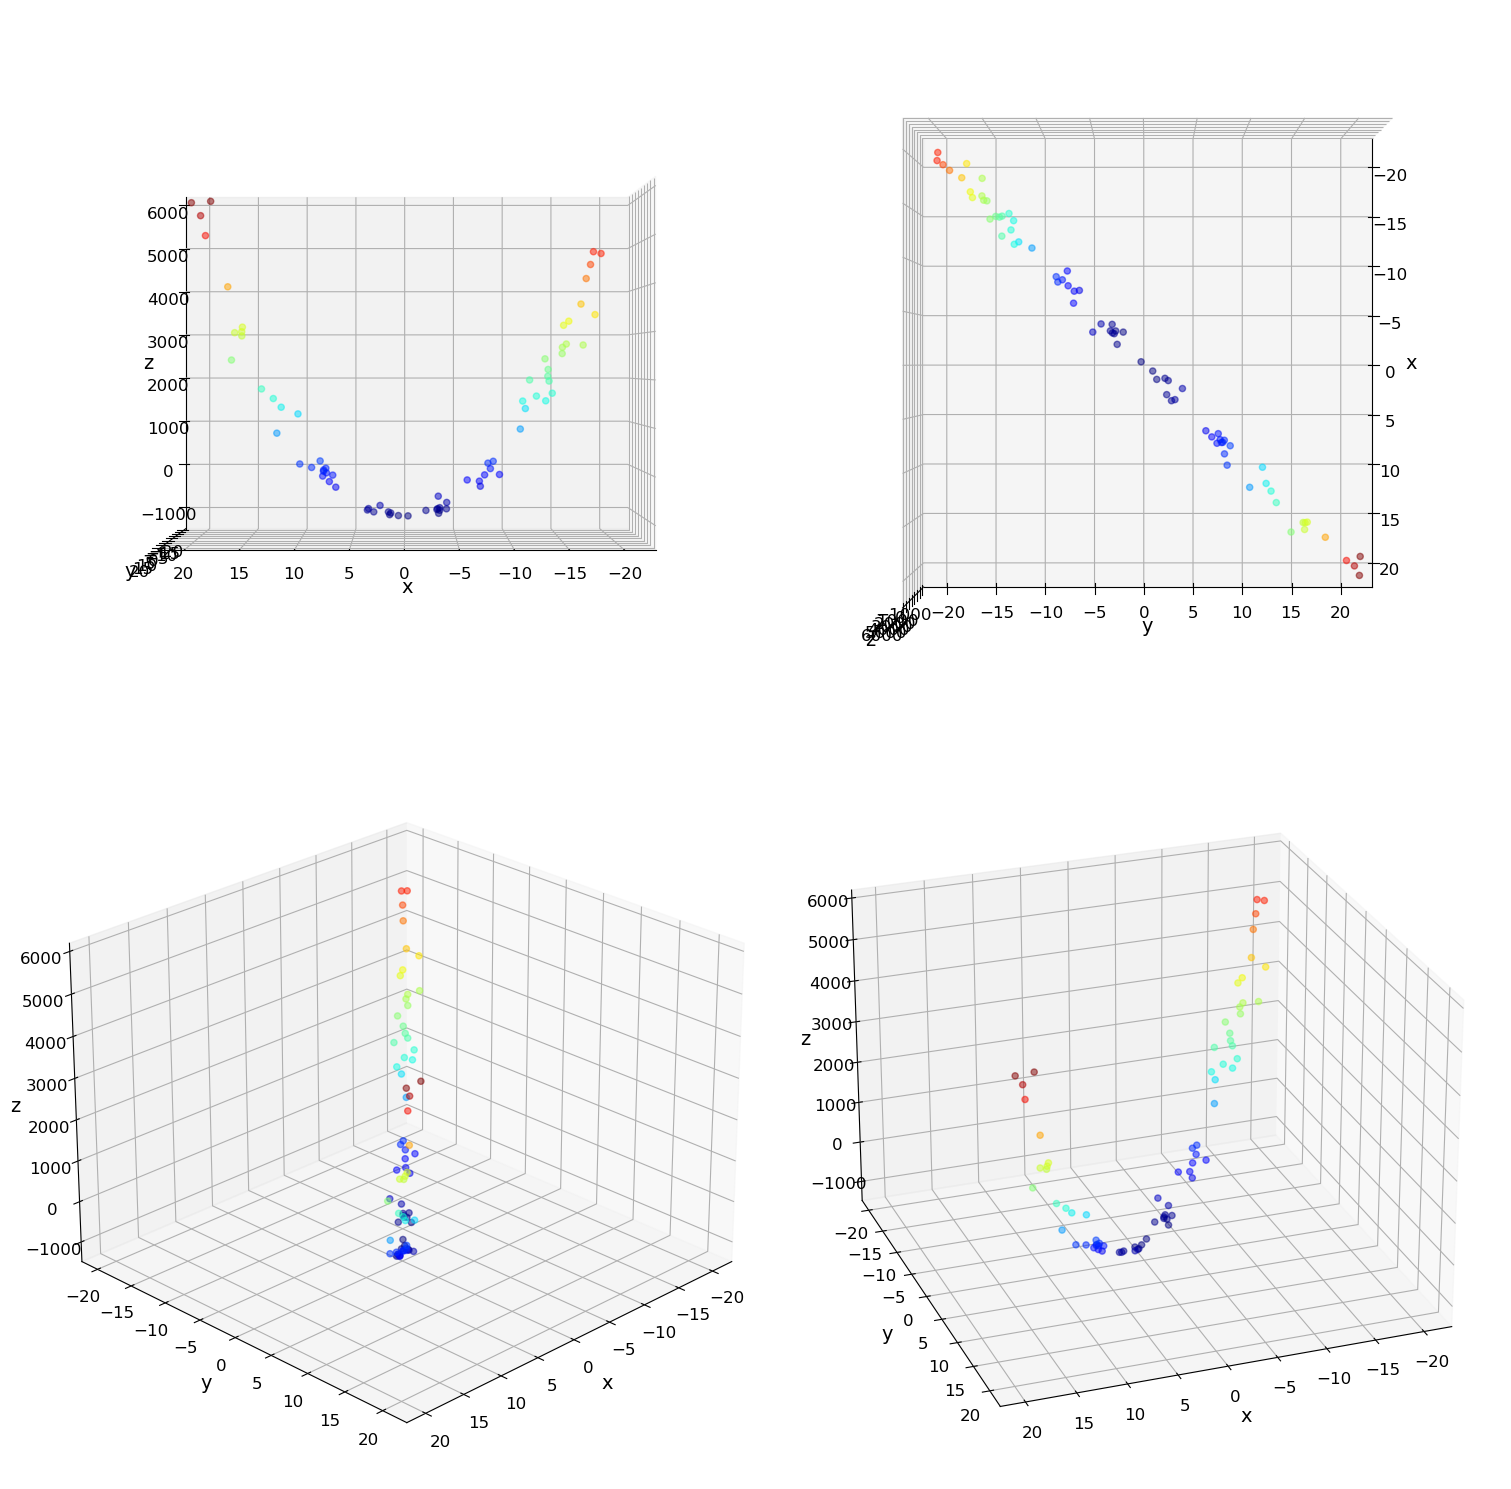

In [3]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))

# Adjusting for correct angles referencing the images given for this assignment.
angles = [(0, 90), (90, 0), (25, 45), (25, 70)]
# Color mapping for the scatter plot using "jet" colormap
jet = plt.cm.jet((df['z'] - df['z'].min()) / (df['z'].max() - df['z'].min()))
# Create four subplots with with the given angles and color mapping
for i, (elev, azim) in enumerate(angles, start=1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.scatter3D(df['x'], df['y'], df['z'], color=jet, alpha=0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=elev, azim=azim)
# Display the plots
plt.tight_layout()
plt.show()


# Perform Polynomial Features Transformation

Perform a polynomial transformation on your features.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Extracting the features 'x' and 'y'
X = df[['x', 'y']]

# Transforming the features
X_poly = poly_features.fit_transform(X)

# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. `x` and `y` will be your training data and `z` will be your response. Print the optimal model parameters to the screen by completing the following `print()` statements.

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Extracting the variable 'z'
y = df['z']

# Fitting the model 
model.fit(X_poly, y)

# Optimal model parameters
coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept



(array([ 8.09457649, -0.09962593, -0.05144212,  0.10558512, 15.94863437]),
 -1000.1381149275458)

In [6]:
print("Computed Model Coefficients: ", coefficients)
print("Computed Model Intercept : ", intercept)

Computed Model Coefficients:  [ 8.09457649 -0.09962593 -0.05144212  0.10558512 15.94863437]
Computed Model Intercept :  -1000.1381149275458


# Create Second Image

Use the following `x_fit` and `y_fit` data to compute `z_fit` by invoking the model's `predict()` method.  This will allow you to plot the line of best fit that is predicted by the model.

In [7]:
# Plot Curve Fit
x_fit = np.linspace(-21,21,1000)
y_fit = x_fit

# Transforming the x_fit and y_fit 
X_fit_poly = poly_features.transform(np.column_stack((x_fit, y_fit)))

# Predict z_fit
z_fit = model.predict(X_fit_poly)



C:\Users\Richard\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Recreate the first image, but plot the line of best fit in each of the subplots as well.

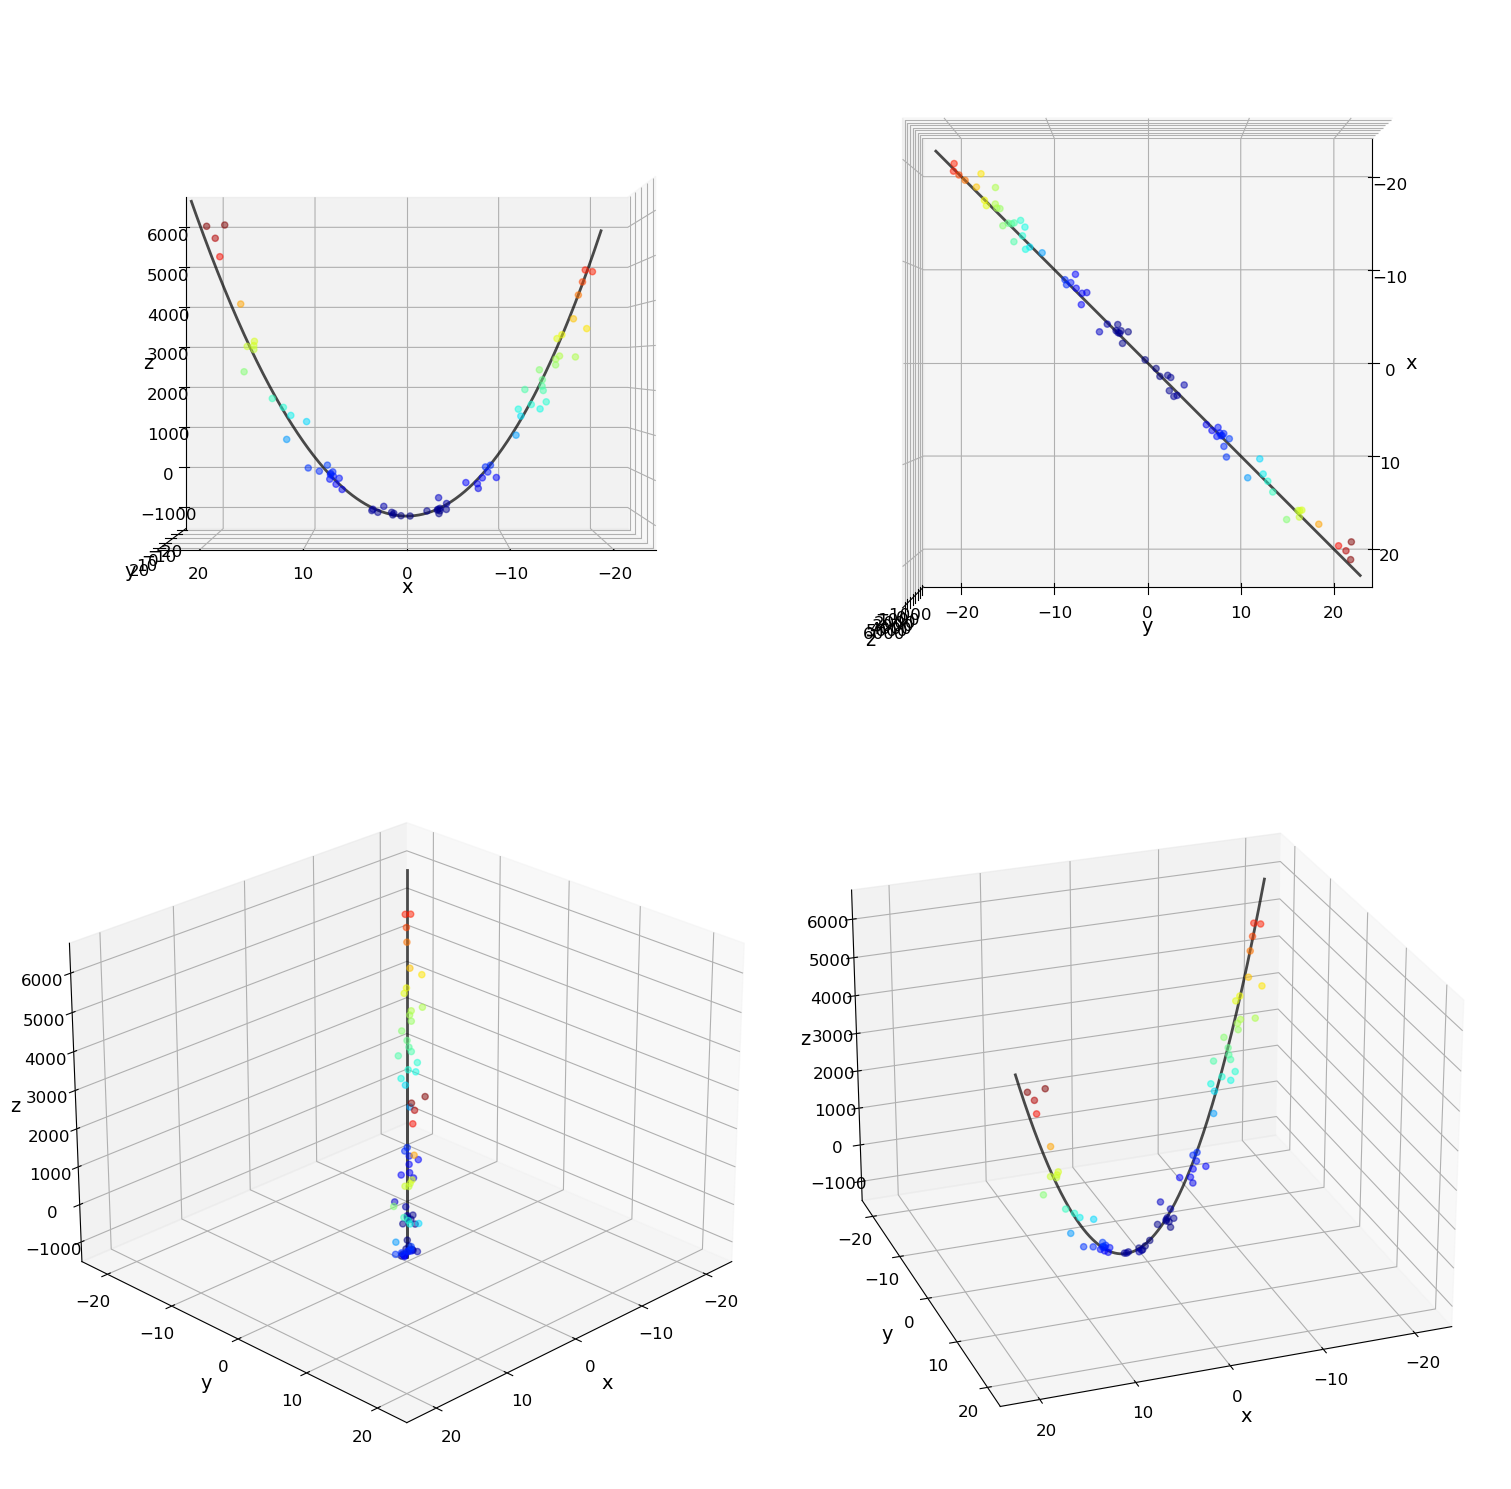

In [8]:
# Recreating the 3D scatter plot with the line of best fit

fig = plt.figure(figsize=(15, 15))

# Adjusting for correct angles referencing the images given for this assignment.
angles = [(0, 90), (90, 0), (25, 45), (25, 70)]
# Color mapping for the scatter plot using "jet" colormap
jet = plt.cm.jet((df['z'] - df['z'].min()) / (df['z'].max() - df['z'].min()))

# Create four subplots with the given angles and color mapping
for i, (elev, azim) in enumerate(angles, start=1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.scatter3D(df['x'], df['y'], df['z'], color=jet, alpha=0.5)
    ax.plot(x_fit, y_fit, z_fit, color='black', linewidth=2, alpha=0.7)  # Plotting the line of best fit
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=elev, azim=azim)

# Display the plots
plt.tight_layout()
plt.show()


# Infer the True Model Parameters

Provided that the true model parameters are **integer values**, you are able to infer the true model parameters by rounding the coefficients and the intercept to the nearest integer value.  You may "hard-code" these values into the below print statements. 

Use the `get_feature_names()` method of the `PolynomialFeatures` class to be certain of which coefficients you calculated!  You need to report your final answers in a format that is ___abundantly clear___ to me which coefficient corresponds to which ___poly feature___ of the model!  You may add more `print()` statements to accomplish this if you must.

In [9]:
# Round the coefficients and the intercept to the nearest integer values
rounded_coefficients = np.round(coefficients).astype(int)
rounded_intercept = int(np.round(intercept))

# Using the get_feature_names() method of the PolynomialFeatures class to get feature names
feature_names = poly_features.get_feature_names_out(input_features=['x', 'y'])

rounded_coefficients, rounded_intercept, feature_names

print("True Model Coefficients: ", rounded_coefficients)
print("True Model Intercept : ", rounded_intercept)
print("True Model Coefficients for x: ", 8)
print("True Model Coefficients for y: ", 0)
print("True Model Coefficients for x^2: ", 0)
print("True Model Coefficients for x*y: ", 0)
print("True Model Coefficients for y^2: ", 16)
print("True Model Intercept : ", -1000)


True Model Coefficients:  [ 8  0  0  0 16]
True Model Intercept :  -1000
True Model Coefficients for x:  8
True Model Coefficients for y:  0
True Model Coefficients for x^2:  0
True Model Coefficients for x*y:  0
True Model Coefficients for y^2:  16
True Model Intercept :  -1000
